<a href="https://colab.research.google.com/github/shreshthajit/Machine-Learning/blob/main/Linear_Regression/Linear_regression_with_Multiple_valirables_Type2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [145]:
#main_data=pd.read_csv('./sample_data/4K_House_Rent_Dataset.csv')
#data=main_data.head(5)
data=pd.read_csv('./sample_data/4K_House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [146]:
data.City[data.City == 'Kolkata']=1
data.City[data.City=='Hyderabad']=3
data.City[data.City=='Mumbai']=2
data.City[data.City=='Bangalore']=4
data.City[data.City=='Delhi']=6
data.City[data.City=='Chennai']=7
x1=data['BHK'].values
x2=data['Size'].values
x3=data['City'].values
x4=data['Bathroom'].values
y=data['Rent'].values
print(Y)

[10000 20000 17000 ... 35000 45000 15000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [149]:
#data.drop(['Posted On','Floor','Area Type','Area Locality','Furnishing Status','Tenant Preferred','Point of Contact'], axis = 1, inplace = True)
data
 

,BHK,Rent,Size,City,Bathroom
0,2,10000,1100,1,2
1,2,20000,800,1,1
2,2,17000,1000,1,1
3,2,10000,800,1,1
4,2,7500,850,1,1
...,...,...,...,...,...
4741,2,15000,1000,3,2
4742,3,29000,2000,3,3
4743,3,35000,1750,3,3
4744,3,45000,1500,3,2


In [150]:
reg = linear_model.LinearRegression()
reg.fit(data.drop('Rent',axis='columns'),data.Rent)

LinearRegression()

In [151]:
reg.coef_

array([-1.17588027e+03,  2.49996759e+01, -4.79503755e+03,  2.65733016e+04])

In [152]:
reg.intercept_

-20308.709726874287

In [153]:
reg.predict([[2,1100, 1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53190.738983])

**Gradient Descent**

In [154]:
m= len(x1)
epoch = 1000
learning_rate=0.000001

theta0 = 1
theta1 = 1
theta2 = 1
theta3 = 1
theta4 = 1
print(m)

4746


In [155]:
for i in range(epoch):
    sum0=0
    sum1=0
    sum2=0
    sum3=0
    sum4=0

    for j in range(m):
        sum0 += (theta0 + theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j])
        sum1 += (theta0 + theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j]) * x1[j]
        sum2 += (theta0 + theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j]) * x2[j]
        sum3 += (theta0 + theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j]) * x3[j]
        sum4 += (theta0 + theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j]) * x4[j]

    theta0 = theta0 - learning_rate * (sum0) / m
    theta1 = theta1 - learning_rate * (sum1) / m
    theta2 = theta2 - learning_rate * (sum2) / m
    theta3 = theta3 - learning_rate * (sum3) / m
    theta4 = theta4 - learning_rate * (sum4) / m



print(theta0,theta1,theta2,theta3,theta4) #slow learning rate will give us nan result

-3.244313122237626 0.8312044492428599 40.69788561526232 -36.055965132206175 6.255055107600219


In [156]:
sum=0
for j in range(m):
  tsum = theta0 +  theta1*x1[j] + theta2*x2[j] + theta3*x3[j] + theta4*x4[j] - y[j]
  tsum = tsum * tsum
  sum = sum + tsum

cost = sum/(2*m)
print(cost)

2557360730.772971


In [157]:
predict = theta0 + theta1*2 + theta2*1100 + theta3*1 + theta4*2
print(predict)

44742.546417647805


**Plotting Diagram**

4746 4746


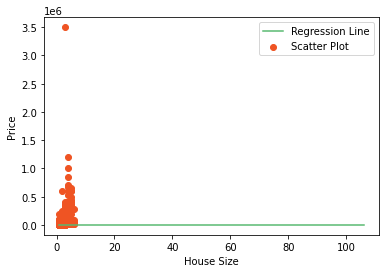

In [158]:
max_x=np.max(x1)+100
min_x=np.min(x1)
x = np.linspace(min_x, max_x, 1000)
yy=theta1*x+theta0
print(len(x1),len(y))
plt.plot(x, yy, color='#58b970', label='Regression Line')
plt.scatter(x1, y, c = "#ef5423", label = 'Scatter Plot')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()


